In [53]:
from transformers import DistilBertTokenizer, DistilBertModel 
import pandas as pd
from datetime import datetime
import torch
import numpy as np
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt

In [2]:
def bert_tokenization(text, tokenizer, model):
    encoded_input = tokenizer(text, return_tensors='pt', max_length=512, truncation=True)
    output = model(**encoded_input)
    #print(output)
    
    return output[1][0]

In [54]:
X_train = pd.read_csv("data/X_train.csv")
X_train = X_train.fillna("")
X_test = pd.read_csv("data/X_test.csv")
X_test = X_test.fillna("")
y_train = pd.read_csv("data/y_train.csv")

In [55]:
tokenizer = DistilBertTokenizer.from_pretrained('bert-base-uncased')
model = DistilBertModel.from_pretrained("bert-base-uncased")

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'BertTokenizer'. 
The class this function is called from is 'DistilBertTokenizer'.
You are using a model of type bert to instantiate a model of type distilbert. This is not supported for all configurations of models and can yield errors.
Some weights of the model checkpoint at bert-base-uncased were not used when initializing DistilBertModel: ['bert.encoder.layer.0.intermediate.dense.bias', 'bert.encoder.layer.4.output.dense.weight', 'bert.encoder.layer.9.attention.output.dense.weight', 'bert.encoder.layer.0.attention.self.value.bias', 'bert.encoder.layer.7.intermediate.dense.weight', 'bert.embeddings.position_embeddings.weight', 'bert.encoder.layer.1.output.dense.bias', 'bert.encoder.layer.2.attention.output.dense.bias', 'bert.encoder.layer.0.output.LayerNorm.weight', 'bert.enco

Some weights of DistilBertModel were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['transformer.layer.5.attention.k_lin.bias', 'transformer.layer.10.ffn.lin2.weight', 'transformer.layer.2.output_layer_norm.bias', 'transformer.layer.7.ffn.lin1.weight', 'transformer.layer.0.output_layer_norm.weight', 'transformer.layer.10.attention.k_lin.bias', 'transformer.layer.11.attention.q_lin.weight', 'transformer.layer.9.attention.out_lin.bias', 'transformer.layer.1.attention.q_lin.weight', 'transformer.layer.1.attention.k_lin.weight', 'transformer.layer.10.output_layer_norm.bias', 'transformer.layer.11.output_layer_norm.weight', 'transformer.layer.0.ffn.lin2.bias', 'transformer.layer.3.attention.q_lin.weight', 'transformer.layer.2.ffn.lin1.bias', 'transformer.layer.8.attention.v_lin.bias', 'transformer.layer.0.attention.v_lin.bias', 'transformer.layer.2.attention.v_lin.bias', 'transformer.layer.5.attention.q_lin.bias', 'transformer.layer.5.ffn.lin1.wei

In [ ]:
#fast_tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")
#fast_tokenizer = PreTrainedTokenizerFast(tokenizer_object=tokenizer)
#model = AutoModelForTokenClassification.from_pretrained("bert-base-uncased")
#model = BertModel.from_pretrained("bert-base-uncased")

In [56]:
tokenized_summary = X_train["Summary"].apply((lambda x: tokenizer.encode(x, add_special_tokens=True, max_length=512, truncation=True)))
test_tokenized_summary = X_test["Summary"].apply((lambda x: tokenizer.encode(x, add_special_tokens=True, max_length=512, truncation=True)))

In [11]:
max_len = 0
for i in tokenized_summary.values:
    if len(i) > max_len:
        max_len = len(i)

padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized_summary.values])

In [57]:
# test
max_len = 0
for i in test_tokenized_summary.values:
    if len(i) > max_len:
        max_len = len(i)

test_padded = np.array([i + [0]*(max_len-len(i)) for i in test_tokenized_summary.values])

In [12]:
np.array(padded).shape

(142, 512)

In [13]:
attention_mask = np.where(padded != 0, 1, 0)
attention_mask.shape

(142, 512)

In [58]:
test_attention_mask = np.where(test_padded != 0, 1, 0)
test_attention_mask.shape

(36, 512)

In [16]:
input_ids = torch.tensor(padded)  
attention_mask = torch.tensor(attention_mask)

C:\Users\gacuf\AppData\Local\Temp\ipykernel_2764\840091192.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  attention_mask = torch.tensor(attention_mask)


In [60]:
test_input_ids = torch.tensor(test_padded)  
test_attention_mask = torch.tensor(test_attention_mask)

C:\Users\gacuf\AppData\Local\Temp\ipykernel_2764\1088769121.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_attention_mask = torch.tensor(test_attention_mask)


In [62]:
test_input_ids[:2].size()

torch.Size([2, 512])

In [36]:
last_hidden_states = []
print(datetime.now())
for i in range(len(input_ids)):
    print(i)
    with torch.no_grad():
        last_hidden_states.append(model(input_ids[i:i+1], attention_mask=attention_mask[i:i+1]))
    
    print(datetime.now())
    

2023-04-26 17:54:31.669106
0
2023-04-26 17:55:26.577492
1
2023-04-26 17:56:18.694185
2
2023-04-26 17:57:10.713215
3
2023-04-26 17:58:03.001824
4
2023-04-26 17:58:54.903955
5
2023-04-26 17:59:46.884973
6
2023-04-26 18:00:39.387809
7
2023-04-26 18:01:31.389983
8
2023-04-26 18:02:23.732401
9
2023-04-26 18:03:16.072789
10
2023-04-26 18:04:08.225956
11
2023-04-26 18:05:00.596973
12
2023-04-26 18:05:52.588346
13
2023-04-26 18:06:44.565918
14
2023-04-26 18:07:36.656598
15
2023-04-26 18:08:30.141367
16
2023-04-26 18:09:23.218046
17
2023-04-26 18:10:15.933751
18
2023-04-26 18:11:08.893072
19
2023-04-26 18:12:00.372269
20
2023-04-26 18:12:53.214120
21
2023-04-26 18:13:47.101111
22
2023-04-26 18:14:39.980876
23
2023-04-26 18:15:32.759350
24
2023-04-26 18:16:25.048277
25
2023-04-26 18:17:17.310102
26
2023-04-26 18:18:09.502557
27
2023-04-26 18:19:01.535482
28
2023-04-26 18:19:53.865174
29
2023-04-26 18:20:46.098759
30
2023-04-26 18:21:38.514892
31
2023-04-26 18:22:30.796055
32
2023-04-26 18:23:24.

In [63]:
# test
test_last_hidden_states = []
print(datetime.now())
for i in range(len(test_input_ids)):
    print(i)
    with torch.no_grad():
        test_last_hidden_states.append(model(test_input_ids[i:i+1], attention_mask=test_attention_mask[i:i+1]))
    
    print(datetime.now())
    

2023-04-26 20:29:53.618615
0
2023-04-26 20:31:33.042151
1
2023-04-26 20:33:13.803969
2
2023-04-26 20:34:54.382331
3
2023-04-26 20:36:36.329078
4
2023-04-26 20:38:16.404158
5
2023-04-26 20:39:51.363058
6
2023-04-26 20:41:30.389362
7
2023-04-26 20:43:11.935649
8
2023-04-26 20:44:03.281300
9
2023-04-26 20:44:54.105685
10
2023-04-26 20:45:44.742896
11
2023-04-26 20:46:35.517462
12
2023-04-26 20:47:26.179840
13
2023-04-26 20:48:17.453663
14
2023-04-26 20:49:08.342376
15
2023-04-26 20:49:59.392635
16
2023-04-26 20:50:49.635526
17
2023-04-26 20:51:40.551911
18
2023-04-26 20:52:31.456986
19
2023-04-26 20:53:22.023900
20
2023-04-26 20:54:13.288501
21
2023-04-26 20:55:03.698347
22
2023-04-26 20:55:54.742795
23
2023-04-26 20:56:45.888470
24
2023-04-26 20:57:36.759007
25
2023-04-26 20:58:27.559822
26
2023-04-26 20:59:18.327744
27
2023-04-26 21:00:09.202510
28
2023-04-26 21:01:00.267866
29
2023-04-26 21:01:51.282356
30
2023-04-26 21:02:42.739222
31
2023-04-26 21:03:34.711866
32
2023-04-26 21:04:27.

In [37]:
features = []
for hidden in last_hidden_states:
    features.append(hidden[0][:,0,:].numpy())


In [64]:
test_features = []
for hidden in test_last_hidden_states:
    test_features.append(hidden[0][:,0,:].numpy())


In [46]:
features[0][0]

array([-1.297749  ,  0.6177742 ,  1.1179985 ,  0.10775139, -1.218515  ,
       -2.0049825 , -1.4731202 ,  1.1575086 ,  1.249286  ,  1.0089082 ,
        0.40229154,  0.33979386, -1.4344492 ,  2.4767342 ,  0.59124494,
        0.07243699,  0.1020606 ,  0.47661543,  0.8743317 ,  1.002098  ,
       -0.8128339 , -0.45847717,  0.75086814,  1.1791458 , -1.0016518 ,
        0.40671864,  0.33499476, -0.06832357,  1.029514  ,  0.10330278,
       -1.2163923 ,  0.5463733 ,  1.1047891 , -0.15749885,  1.198576  ,
       -0.6474195 ,  1.3939791 ,  0.17962298, -1.3608097 , -0.49459186,
       -0.8700414 ,  0.7023295 , -1.6884658 ,  0.15457508, -0.35786957,
        0.8495121 , -1.1134127 , -1.9912559 , -0.94491947, -1.6747416 ,
       -0.21345194,  0.75022274, -0.49959135, -0.5916082 , -0.32118875,
        0.9151058 , -1.0138265 ,  1.4407977 ,  0.07056344, -0.57056296,
       -0.1144355 ,  0.33577606, -0.88366747, -0.44643605, -0.7643327 ,
        0.913846  ,  0.8838979 , -1.1416832 , -0.69361776,  0.12

In [ ]:
torch.save(features, "data/train_summaries.pt")


In [65]:
torch.save(test_features, "data/test_summaries.pt")

In [47]:
train_profiles_features = []
for f in features:
    vector = f[0]
    train_profiles_features.append(vector)

In [48]:
svd = TruncatedSVD(n_components=2)
svd_mdl = svd.fit_transform(train_profiles_features)

In [51]:
#svd_mdl
V_plot = pd.DataFrame()
V_plot["X"] = svd_mdl[:,0]
V_plot["Y"] = svd_mdl[:,1]
V_plot["label"] = y_train["label"]

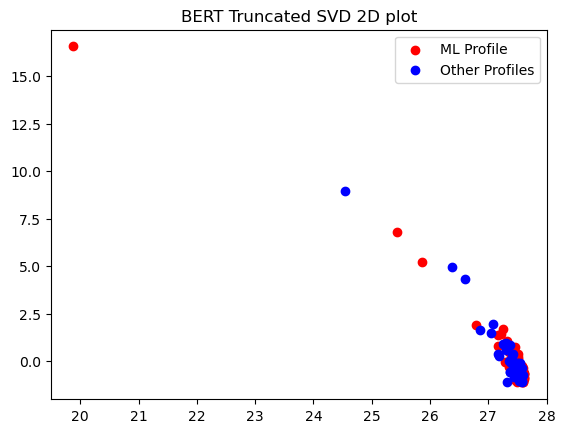

In [52]:
plt.scatter(V_plot[V_plot["label"]==1]["X"], V_plot[V_plot["label"]==1]["Y"], c="red", label="ML Profile")
plt.scatter(V_plot[V_plot["label"]==0]["X"], V_plot[V_plot["label"]==0]["Y"], c="blue", label="Other Profiles")
plt.title("BERT Truncated SVD 2D plot")
plt.legend()

In [ ]:
summary_tokens = []
experience_tokens = []
education_tokens = []

train_profiles_bert = pd.DataFrame()

In [ ]:
for row in X_train.iterrows():
    #if row[0] < 57:
    #    continue
        
    print(row[0])
    summary = row[1]["Summary"]
    
    now = datetime.now()
    
    summary_tokens.append(bert_tokenization(summary, tokenizer, model))
    elapsed = datetime.now() - now
    now = datetime.now()
    print("Profile: ", row[0], " Summary: ", elapsed.total_seconds())
    
    if (row[0]+1)%5 == 0:
        torch.save(summary_tokens, "data/train_summaries.pt")
    

In [ ]:
for row in X_train.iterrows():
    if row[0] < 57:
        continue
        
    print(row[0])
    experience = row[1]["Experience"]
    
    now = datetime.now()
    
    experience_tokens.append(bert_tokenization(experience, tokenizer, model))
    elapsed = datetime.now() - now
    now = datetime.now()
    print("Profile: ", row[0], " Experience: ", elapsed.total_seconds())
    
    if (row[0]+1)%5 == 0:
        torch.save(summary_tokens, "data/train_experience.pt")

In [ ]:
for row in X_train.iterrows():
    if row[0] < 57:
        continue
        
    print(row[0])
    education = row[1]["Education"]
    
    now = datetime.now()
    
    experience_tokens.append(bert_tokenization(education, tokenizer, model))
    elapsed = datetime.now() - now
    now = datetime.now()
    print("Profile: ", row[0], " Education: ", elapsed.total_seconds())
    
    if (row[0]+1)%5 == 0:
        torch.save(summary_tokens, "data/train_education.pt")

In [ ]:
train_profiles_bert["Summary"] = summary_tokens
train_profiles_bert["Experience"] = experience_tokens
train_profiles_bert["Education"] = education_tokens
train_profiles_bert.to_csv("data/train_profiles_bert.csv")